# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [101]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [102]:
# Load Data 
train_data = pd.read_csv("assignment2_data.csv")
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [103]:
train_data.shape

(6019, 14)

In [104]:
# import 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [106]:
train_data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [107]:
# 제일 첫 칼럼 index 삭제

train_data = train_data.iloc[:,1:]

train_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


New price는 뭐지...?!

## EDA

In [108]:
# categorical features 들을 먼저 살펴보자.
# categorical : location, fuel_type, transmission, owner_type
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())



['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [109]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

대부분의 데이터가 New_Price 가 null이다. 고로 삭제한다.

In [110]:
train_data.drop(["New_Price"],axis=1,inplace=True)

In [111]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [112]:
# 결측치 포함 데이터는 삭제한다.

train_data.dropna(inplace=True)
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [113]:
train_data = train_data.reset_index(drop=True)

In [114]:
train_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


- Name : 회사명을 따로 만드는 것이 좋을 것 같다.
- Location : 중요한지 잘 모르겠다.
- year : 연식을 따지는 칼럼으로 바꾸면 좋을 것 같다.
- Mileage : 뒤에 단위를 빼야할 것 같다.
- Engine : 뒤에 단위를 빼야할 것 같다.
- Power : 뒤에 단위를 빼야할 것 같다.


In [115]:
for i in range(train_data.shape[0]):
    #회사명 만들기
    train_data.at[i,'Company'] = train_data['Name'][i].split()[0]
    #단위 빼기
    train_data.at[i,'Mileage'] = train_data['Mileage'][i].split()[0]
    train_data.at[i,'Engine'] = train_data['Engine'][i].split()[0]
    train_data.at[i,'Power'] = train_data['Power'][i].split()[0]
    


In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Company            5975 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 607.0+ KB


모델링 할 것을 대비해 float으로 형 변환이 필요하다

In [117]:
train_data['Mileage'] = train_data['Mileage'].astype(float)
train_data['Engine'] = train_data['Engine'].astype(float)
train_data['Power'] = train_data['Power'].astype(float)

ValueError: could not convert string to float: 'null'

'Power'에 string 이 포함되어 있다고 한다.

In [118]:
remove_index = []

for i in range(train_data.shape[0]):
    if train_data['Power'][i]=='null':
        print(i,end=' ')
        remove_index.append(i)

print()
print(len(remove_index),'개')

76 79 89 120 143 225 242 259 304 305 383 421 425 440 469 572 628 644 645 735 744 824 910 921 929 1063 1138 1148 1266 1313 1338 1380 1411 1546 1569 1640 1663 1848 1989 2043 2118 2152 2250 2254 2292 2328 2377 2425 2434 2481 2485 2511 2561 2579 2616 2621 2868 3010 3038 3081 3166 3224 3266 3414 3491 3506 3562 3601 3611 3618 3642 3706 3868 3900 3969 4046 4049 4318 4321 4593 4672 4676 4706 4792 4848 4862 4914 5024 5078 5186 5383 5395 5415 5486 5490 5604 5712 5716 5818 5830 5881 5899 5941 
103 개


In [119]:
# 103개 삭제

train_data = train_data.drop(train_data.index[remove_index])
train_data = train_data.reset_index(drop=True)



In [120]:
train_data.shape

(5872, 13)

In [121]:
# 마저 형 변환을 해준다.

train_data['Power'] = train_data['Power'].astype(float)

In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
 12  Company            5872 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 596.5+ KB


<Figure size 1440x720 with 0 Axes>

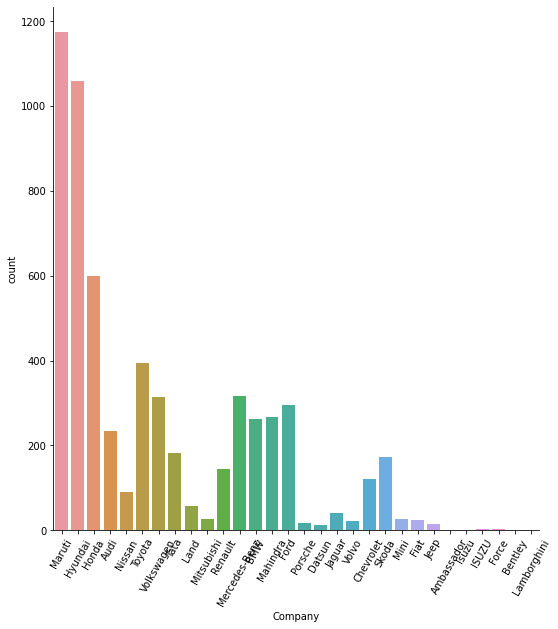

In [123]:
plt.figure(figsize=(20,10))
sns.catplot(x='Company',kind="count",height = 8, data=train_data)
plt.xticks(rotation=60)
plt.show()

In [124]:
train_data = pd.get_dummies(train_data,columns = ["Company","Owner_Type","Transmission","Fuel_Type","Location"],drop_first=True)

In [125]:
train_data.head(10)

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_Audi,Company_BMW,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,...,0,0,1,0,0,0,0,0,0,0
5,Hyundai EON LPG Era Plus Option,2012,75000,21.10,814.0,55.20,5.0,2.35,0,0,...,0,0,0,0,1,0,0,0,0,0
6,Nissan Micra Diesel XV,2013,86999,23.08,1461.0,63.10,5.0,3.50,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,11.36,2755.0,171.50,8.0,17.50,0,0,...,0,0,0,0,0,0,0,0,1,0
8,Volkswagen Vento Diesel Comfortline,2013,64430,20.54,1598.0,103.60,5.0,5.20,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Tata Indica Vista Quadrajet LS,2012,65932,22.30,1248.0,74.00,5.0,1.95,0,0,...,0,1,0,0,0,0,0,0,0,0


In [126]:
# "Name" 도 뺀다.
train_data.drop(["Name"],axis=1,inplace=True)
train_data.head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_Audi,Company_BMW,Company_Bentley,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2012,75000,21.10,814.0,55.20,5.0,2.35,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2013,86999,23.08,1461.0,63.10,5.0,3.50,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,2016,36000,11.36,2755.0,171.50,8.0,17.50,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2013,64430,20.54,1598.0,103.60,5.0,5.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2012,65932,22.30,1248.0,74.00,5.0,1.95,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [127]:
y = train_data['Price']
y.head(10)

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
5     2.35
6     3.50
7    17.50
8     5.20
9     1.95
Name: Price, dtype: float64

In [130]:
train_data.drop(["Price"],axis=1,inplace=True)
train_data.head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Company_Audi,Company_BMW,Company_Bentley,Company_Chevrolet,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2012,75000,21.10,814.0,55.20,5.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2013,86999,23.08,1461.0,63.10,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,2016,36000,11.36,2755.0,171.50,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2013,64430,20.54,1598.0,103.60,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2012,65932,22.30,1248.0,74.00,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [131]:
X = train_data
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Company_Audi,Company_BMW,Company_Bentley,Company_Chevrolet,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 25)

In [134]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
pred= model.predict(X_test)

print(f'training accuracy : {model.score(X_train,y_train)}')
print(f'test accuracy : {model.score(X_test,y_test)}')




training accuracy : 0.984477582444873
test accuracy : 0.912679288672483


In [137]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'Mean Absolute Error : {metrics.mean_absolute_error(y_test,pred)}')
print(f'Mean Squared Error : {metrics.mean_squared_error(y_test,pred)}')
print(f'Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,pred))}')
print(f'R Squared Error : {metrics.r2_score(y_test,pred)}')

Mean Absolute Error : 1.4573675862208713
Mean Squared Error : 10.23315080499522
Root Mean Squared Error : 3.1989296342675653
R Squared Error : 0.912679288672483


Good!!